### Ayushi Malaviya
### Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc,roc_auc_score
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('AL_NJ_Income_pct.csv', na_values = '?')

In [3]:
data.shape

(1167, 10)

In [4]:
data.isnull().sum()

STATEFIPS       0
STATE           0
zipcode         0
Returns_pct1    0
Returns_pct2    0
Returns_pct3    0
Returns_pct4    0
Returns_pct5    0
Returns_pct6    0
total           0
dtype: int64

In [5]:
data.head(10)

,STATEFIPS,STATE,zipcode,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6,total
0,1,AL,35004,28.98,27.06,18.23,12.48,12.09,1.15,5210
1,1,AL,35005,42.26,30.97,14.52,6.45,5.81,0.00,3100
2,1,AL,35006,35.83,27.50,15.83,10.00,10.83,0.00,1200
3,1,AL,35007,34.09,22.19,15.24,11.22,15.24,2.01,11940
4,1,AL,35010,45.76,26.17,11.25,6.70,7.84,2.28,7910
5,1,AL,35014,40.74,28.40,12.96,8.64,7.41,1.85,1620
6,1,AL,35016,39.41,24.26,14.87,9.54,10.10,1.82,7130
7,1,AL,35019,40.45,28.09,15.73,6.74,8.99,0.00,890
8,1,AL,35020,60.22,27.29,7.96,2.54,1.77,0.22,9050
9,1,AL,35022,33.06,24.80,16.43,10.41,13.27,2.04,9800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATEFIPS     1167 non-null   int64  
 1   STATE         1167 non-null   object 
 2   zipcode       1167 non-null   int64  
 3   Returns_pct1  1167 non-null   float64
 4   Returns_pct2  1167 non-null   float64
 5   Returns_pct3  1167 non-null   float64
 6   Returns_pct4  1167 non-null   float64
 7   Returns_pct5  1167 non-null   float64
 8   Returns_pct6  1167 non-null   float64
 9   total         1167 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 91.3+ KB


Converted categorical data column into int by using label encoder.  

In [7]:
label_encoder = LabelEncoder()
data['STATE'] = label_encoder.fit_transform(data['STATE'])

In [8]:
data

,STATEFIPS,STATE,zipcode,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6,total
0,1,0,35004,28.98,27.06,18.23,12.48,12.09,1.15,5210
1,1,0,35005,42.26,30.97,14.52,6.45,5.81,0.00,3100
2,1,0,35006,35.83,27.50,15.83,10.00,10.83,0.00,1200
3,1,0,35007,34.09,22.19,15.24,11.22,15.24,2.01,11940
4,1,0,35010,45.76,26.17,11.25,6.70,7.84,2.28,7910
...,...,...,...,...,...,...,...,...,...,...
1162,34,1,8887,23.88,22.39,19.40,11.94,17.91,4.48,670
1163,34,1,8889,23.25,13.63,10.22,9.02,24.85,19.04,4990
1164,34,1,8901,50.37,30.12,10.18,3.89,4.21,1.23,18760
1165,34,1,8902,29.67,22.66,14.69,10.27,17.09,5.62,20830


In [9]:
data.describe()

,STATEFIPS,STATE,zipcode,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6,total
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,17.287918,0.493573,22125.734362,36.524944,22.808278,13.709623,8.803059,13.122545,5.031482,5404.841474
std,16.505710,0.500173,14031.503677,10.450633,5.924677,4.229686,3.212244,7.552240,7.769220,5997.633563
min,1.000000,0.000000,7001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,1.000000,0.000000,7976.500000,27.915000,18.825000,11.850000,7.215000,7.460000,0.000000,1115.000000
50%,1.000000,0.000000,35019.000000,35.860000,23.910000,13.830000,9.130000,11.900000,1.700000,3300.000000
75%,34.000000,1.000000,36011.500000,43.025000,27.020000,15.540000,10.810000,19.660000,5.910000,7530.000000
max,34.000000,1.000000,36925.000000,72.260000,44.000000,100.000000,23.080000,34.880000,51.210000,32070.000000


In [10]:
X = pd.DataFrame(data.drop(['total','zipcode','STATE','STATEFIPS'], axis=1))
feature_list = list(X)
y = data['STATE']
target = pd.DataFrame(y)

In [11]:
X.shape

(1167, 6)

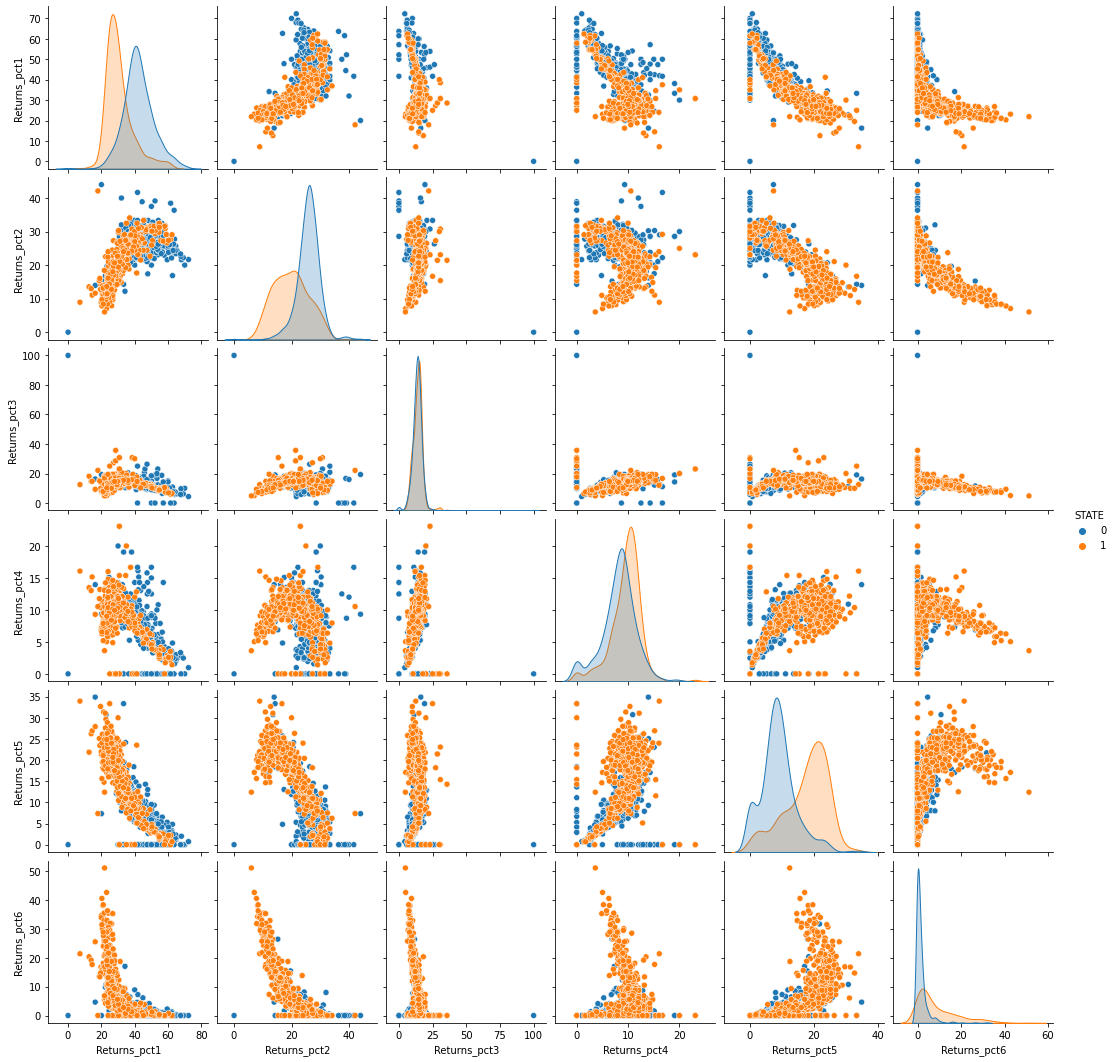

In [12]:
sns.pairplot(data, hue='STATE', vars=['Returns_pct1','Returns_pct2','Returns_pct3','Returns_pct4','Returns_pct5','Returns_pct6'])

### Principal Component Analysis

Now, Our Data has many features which is hard to visualise on two dimensional and three dimensional techniques.
Hence, PCA technique is performed.

In [13]:
pca = PCA(n_components = 6)
pca.fit_transform(X)
pca.explained_variance_ratio_.cumsum()

array([0.7396359 , 0.89497323, 0.94459695, 0.98072714, 0.99999997,
       1.        ])

As you can see, Data with Feature 3 and feature 4 explains most of the features in the dataset. Hence those features should be 
used after performing PCA for 4 components

### Scaled the given dataset to have standardised values of the column between (0,1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(X)

I have used 4 components in pca as after 4 feature variance ratio is near to 100 of insights of the data. 

In [15]:
pca1 = PCA(n_components = 4)
X_pca_scaled = pca1.fit_transform(X_Scaled)
X_pca_scaled = pd.DataFrame(X_pca_scaled)
X_pca_scaled.columns = ['P1', 'P2', 'P3', 'P4']
X_pca_scaled.shape

(1167, 4)

### 1. Use the kmeans clustering method to create two clusters for the “AL_NJ_Income_pct” dataset. 

## Kmeans Algorithm Implementation

In [16]:
model = KMeans(n_clusters = 2, init= 'k-means++', n_init=100, max_iter=1000)
# Fit the data and predict the cluster assignment for each data point
scaled_km_labels = model.fit_predict(X_Scaled)
# View the cluster assigments
scaled_km_labels

C:\Users\AYUSHI D MALAVIYA\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 1])

Text(0.5, 1.0, 'Scaled Dataset')

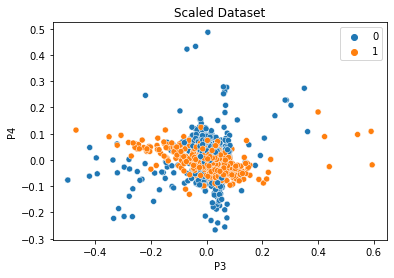

In [17]:
sns.scatterplot(x=X_pca_scaled['P3'], y = X_pca_scaled['P4'], data=X_pca_scaled, hue=scaled_km_labels).set_title('Scaled Dataset')

### 2. Show the cross tabulation of the clusters versus the State feature.

#### Below, I have used Confusion matrix for Cross tabulation because cross tabulation means to provide frequency for the predicted and tested dataset values.

Accuracy Score is:  0.7952013710368466



classification_report : 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       591
           1       0.85      0.71      0.77       576

    accuracy                           0.80      1167
   macro avg       0.80      0.79      0.79      1167
weighted avg       0.80      0.80      0.79      1167
 


Confusion Matrix of data predicted 
 [[520  71]
 [168 408]] 




<AxesSubplot:>

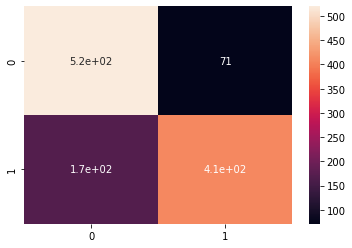

In [18]:
print('Accuracy Score is: ',accuracy_score(y, scaled_km_labels)) #TP+FN/TP+TF+FP+FN
print('\n\n\nclassification_report : \n',classification_report(y, scaled_km_labels),'\n\n') 
#precision = TP/TP+FP & recall = TP/TP+TN & f1_score = harmonic_mean of pre and recall 
print('Confusion Matrix of data predicted \n',confusion_matrix(y, scaled_km_labels),'\n\n') #TP,TN,FP,FN,
sns.heatmap(pd.DataFrame(confusion_matrix(y, scaled_km_labels)), annot=True)

### 3. Use the hierarchical clustering method and single linkage to create 4 clusters for the the “AL_NJ_Income_pct” dataset.  

## Hierarchical Cluster Analysis using Agglomerative Clustering 

Visulization of the single linkage dendogram

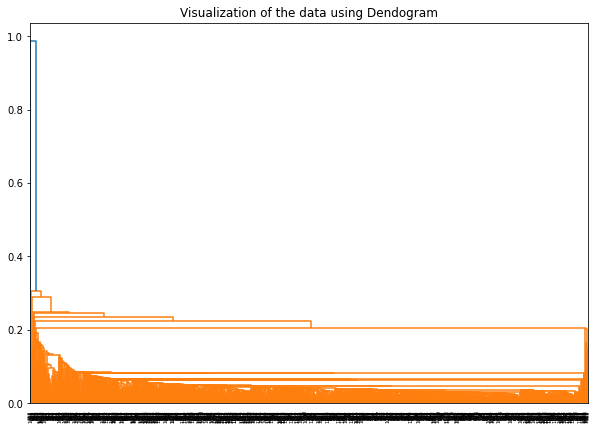

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Visualization of the data using Dendogram")

clusters = hc.linkage(X_Scaled,method='single',metric="euclidean")
hc.dendrogram(Z=clusters)
plt.show()

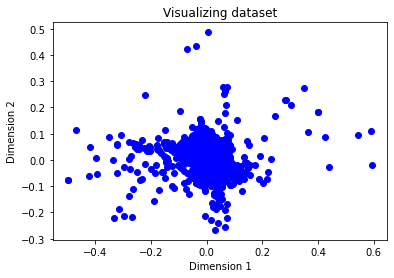

In [20]:
plt.scatter(X_pca_scaled['P3'], X_pca_scaled['P4'], color='blue')
plt.title("Visualizing dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(False)

### 4. Identify the outliers (if any).

Outlier detection using Agglomerative clustering algorithm

In [21]:
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
clustered_scaled = clustering_model.fit(X_Scaled)
labels = clustering_model.labels_

Text(0.5, 1.0, 'Scaled Data')

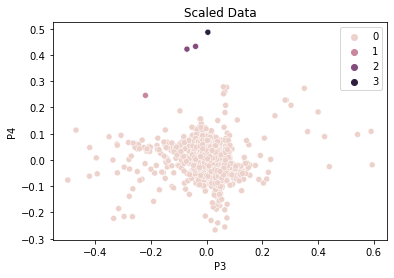

In [22]:
sns.scatterplot(x =X_pca_scaled['P3'], y=X_pca_scaled['P4'], data=X_pca_scaled, hue=labels).set_title('Scaled Data')

The outliers for given datasets are all dark coloured datapoints